In [1]:
import keras; 
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.4.3
2.3.0


In [2]:
import pandas as pd
import pylab as pylb
import numpy as np

import os

os.getcwd()

'C:\\Users\\Vishnu\\Desktop\\SceneDetection\\SceneDetection'

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
# temp cnn model

import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

x_train = x_train[0:100]
y_train = y_train[0:100]

x_test = x_test[0:10]
y_test = y_test[0:10]

print(x_train.shape)
print(x_test.shape)

# check output classification values
yDfObj = pd.DataFrame(y_train, columns=['type'])
print(yDfObj['type'].unique())

num_filters = 8
filter_size = 3
pool_size = 2

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(100, 32, 32, 3)
(10, 32, 32, 3)
[6 9 4 1 2 7 8 3 5 0]


In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])   

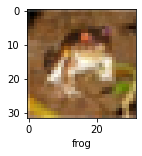

In [9]:
plot_sample(x_train, y_train, 0)

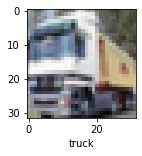

In [10]:
plot_sample(x_train, y_train, 1)

In [11]:
# do normalization
x_train = x_train/255
x_test = x_test/255

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
print(cnn.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-1.02496952e-01, -1.03754312e-01, -1.01051144e-01,
          -8.74634683e-02,  3.00520360e-02,  1.31546184e-01,
           5.63822687e-03,  9.84045118e-02, -9.24584568e-02,
          -7.46470764e-02, -1.76897645e-02,  8.89959186e-02,
           8.96810293e-02,  4.58514839e-02,  5.68295717e-02,
          -1.03723451e-01, -4.69341204e-02, -6.59423172e-02,
          -2.69265622e-02, -2.70425901e-02,  3.89280915e-03,
           2.08249092e-02,  1.22861430e-01, -3.95080447e-02,
           1.03999451e-01,  7.71692097e-02,  4.35750186e-02,
          -2.32519135e-02, -1.05133690e-01, -5.59675992e-02,
           4.85295802e-02,  2.58299708e-02],
         [ 1.05818838e-01, -1.12697959e-01,  8.91281962e-02,
          -1.18803300e-01, -1.11586533e-01, -8.42727125e-02,
          -1.15229636e-01,  9.76943225e-02, -2.63818279e-02,
          -1.27382621e-01, -3.05749923e-02,  8.21115822e-02,
          -8.18079412e-02, 

In [15]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 24ms/step - loss: 2.2830 - accuracy: 0.1100
Epoch 2/5
4/4 [==============================] - 0s 24ms/step - loss: 2.2246 - accuracy: 0.1600
Epoch 3/5
4/4 [==============================] - 0s 25ms/step - loss: 2.1936 - accuracy: 0.1700
Epoch 4/5
4/4 [==============================] - 0s 26ms/step - loss: 2.1713 - accuracy: 0.2400
Epoch 5/5
4/4 [==============================] - 0s 25ms/step - loss: 2.1731 - accuracy: 0.1600


In [16]:
cnn.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 2.6206 - accuracy: 0.0000e+00


[2.620601177215576, 0.0]

In [17]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[0.05548949, 0.18010484, 0.1327901 , 0.13052136, 0.07117488,
        0.06999177, 0.04406409, 0.16119215, 0.02854301, 0.1261283 ],
       [0.04674065, 0.18738173, 0.12665807, 0.14559788, 0.06798214,
        0.06648208, 0.03861479, 0.159347  , 0.02313688, 0.13805869],
       [0.05768308, 0.16498016, 0.13092661, 0.13976528, 0.07378486,
        0.07295137, 0.04429857, 0.15207136, 0.03415656, 0.12938216],
       [0.05102395, 0.17379649, 0.13470553, 0.14349763, 0.06918773,
        0.0713663 , 0.03978757, 0.16476855, 0.02665155, 0.12521464],
       [0.06140425, 0.1503796 , 0.13153824, 0.12895252, 0.08423159,
        0.07563055, 0.0536866 , 0.1546822 , 0.03681713, 0.12267715]],
      dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 7]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

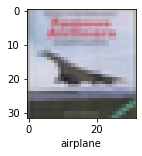

In [20]:
plot_sample(x_test, y_test,3)

In [21]:
print(cnn.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-1.02135442e-01, -9.49164107e-02, -1.01551928e-01,
          -8.59681889e-02,  3.14430147e-02,  1.30352005e-01,
           5.23537351e-03,  9.69012529e-02, -8.89472738e-02,
          -7.71869794e-02, -1.81427263e-02,  8.65298808e-02,
           9.16057304e-02,  5.04821241e-02,  5.92362508e-02,
          -1.01448253e-01, -4.94239442e-02, -6.87538832e-02,
          -2.10229494e-02, -2.79557053e-02,  4.53433068e-03,
           2.70781126e-02,  1.19811200e-01, -3.77495661e-02,
           1.06436707e-01,  8.63487497e-02,  3.81480977e-02,
          -2.59971507e-02, -1.06983796e-01, -4.74787466e-02,
           4.57141027e-02,  2.45709531e-02],
         [ 1.05292529e-01, -1.16284840e-01,  8.78360048e-02,
          -1.12671480e-01, -1.09797314e-01, -8.52968991e-02,
          -1.17362387e-01,  9.74631310e-02, -2.43722573e-02,
          -1.33826569e-01, -3.23825367e-02,  8.01598430e-02,
          -8.15377757e-02, 

In [22]:
extractor = keras.Model(inputs=cnn.inputs, outputs=[layer.output for layer in cnn.layers])
features = extractor(x_train)

In [23]:
print(extractor.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-1.02135442e-01, -9.49164107e-02, -1.01551928e-01,
          -8.59681889e-02,  3.14430147e-02,  1.30352005e-01,
           5.23537351e-03,  9.69012529e-02, -8.89472738e-02,
          -7.71869794e-02, -1.81427263e-02,  8.65298808e-02,
           9.16057304e-02,  5.04821241e-02,  5.92362508e-02,
          -1.01448253e-01, -4.94239442e-02, -6.87538832e-02,
          -2.10229494e-02, -2.79557053e-02,  4.53433068e-03,
           2.70781126e-02,  1.19811200e-01, -3.77495661e-02,
           1.06436707e-01,  8.63487497e-02,  3.81480977e-02,
          -2.59971507e-02, -1.06983796e-01, -4.74787466e-02,
           4.57141027e-02,  2.45709531e-02],
         [ 1.05292529e-01, -1.16284840e-01,  8.78360048e-02,
          -1.12671480e-01, -1.09797314e-01, -8.52968991e-02,
          -1.17362387e-01,  9.74631310e-02, -2.43722573e-02,
          -1.33826569e-01, -3.23825367e-02,  8.01598430e-02,
          -8.15377757e-02, 

In [25]:
print(len(features))

7


In [26]:
features[4]

<tf.Tensor: shape=(100, 2304), dtype=float32, numpy=
array([[0.        , 0.02237036, 0.        , ..., 0.04941097, 0.        ,
        0.        ],
       [0.03634099, 0.        , 0.        , ..., 0.08781245, 0.020726  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04066788, 0.00230777,
        0.        ],
       ...,
       [0.01376771, 0.0275563 , 0.        , ..., 0.01110557, 0.01781328,
        0.        ],
       [0.        , 0.00945803, 0.        , ..., 0.06825768, 0.02814631,
        0.        ],
       [0.        , 0.02109669, 0.        , ..., 0.03539279, 0.04026498,
        0.        ]], dtype=float32)>

In [27]:
features[4][0]

<tf.Tensor: shape=(2304,), dtype=float32, numpy=
array([0.        , 0.02237036, 0.        , ..., 0.04941097, 0.        ,
       0.        ], dtype=float32)>